<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/FourierComplex_InverterSixStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Complex Fourier Series</h1></b>

Dr. Bingsen Wang

2/16/2025
</center>

#Fourier Coefficients for Real Function

The complex Fourier series of a periodic real function $f(t)$ with period $T$ is
$$f(t) = \sum_{n=-\infty}^\infty c_ne^{jn\omega t}$$
where
$$c_n = \frac{1}{T}\int_0^Tf(t)e^{-jn\omega t}dt$$ and $\omega =\frac{2\pi}{T}$.



#Fourier Coefficients for Complex Function

$$f(t)+jf(t-T/4) = \sum_{n=-\infty}^\infty c_n[e^{jn\omega t}+je^{jn\omega(t-T/4)}]\\
=\sum_{n=-\infty}^\infty c_n[1+je^{-jn\pi/2}]e^{jn\omega t}$$

#Python Code

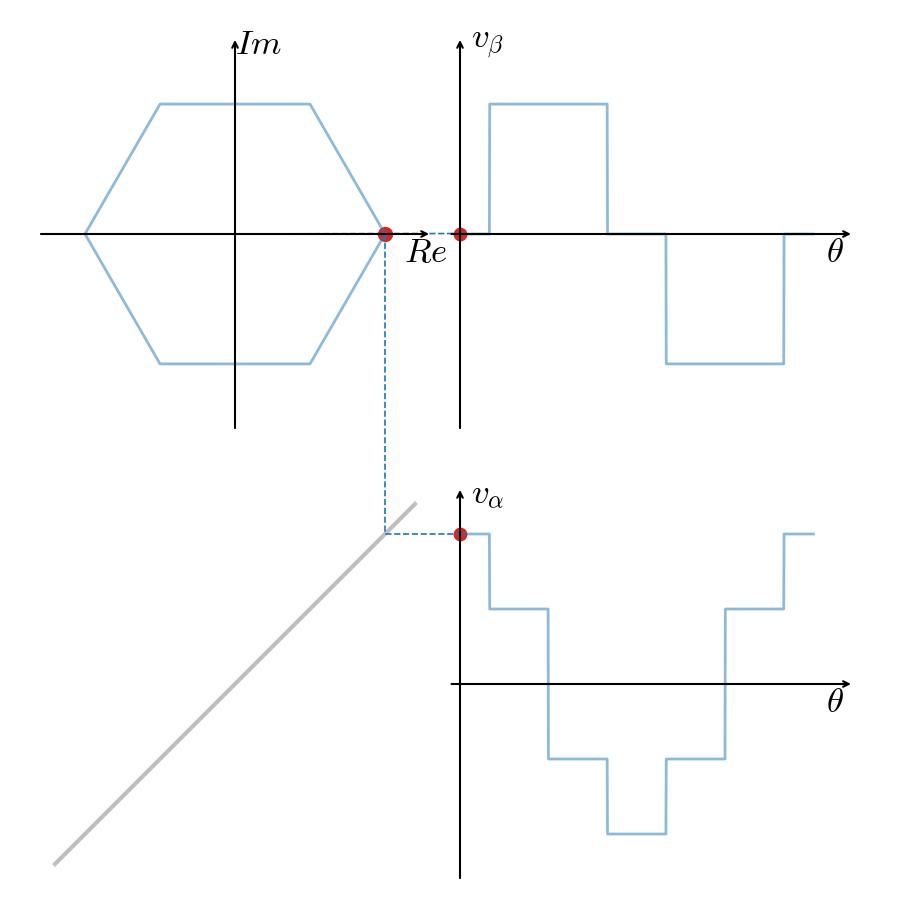

In [92]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def fv(x,r):
  a = np.exp(1j*2*np.pi/3)
  fabc=[np.heaviside(np.cos(x-k*2*np.pi/3),0)*2 for k in range(3)]
  return r*2/3*(fabc[0]+fabc[1]*a+fabc[2]*a**2)

Nl,Nf,r,x0,y0 = 3,1024,2,[0,4,4],[0,0,-8]
n,theta = [1,5,7,11,13,-1,-5,-7,-11,-13],np.linspace(0,2*np.pi,Nf)
fab = fv(theta,r)
fab_fft=np.fft.fft(fab)/Nf/2
f= sum([fab_fft[k]*np.exp(1j*k*theta) for k in n])
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-4,12],ylim=[-12,4])
ax.axis('off')
ax.plot([x0[0]-3.2,x0[0]+3.2],[y0[2]-3.2,y0[2]+3.2],lw=3,c='.5',alpha=.5)
ax.plot(x0[0]+fab.real,fab.imag+y0[0],theta+x0[1],fab.imag+y0[1],theta+x0[2],fab.real+y0[2],lw=2,c=clst[0],alpha=.5)
[ax.annotate('',[(x0[i]+[3.5,7,7][i],y0[i]),(x0[i],y0[i]+3.5)][k],
              [(x0[i]+[-3.5,-.2,-.2][i],y0[i]),(x0[i],y0[i]-3.5)][k],
             arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(3) for k in range(2)]
[ax.text([x0[i]+[3,6.5,6.5][i],x0[i]][k],[y0[i],y0[i]+3.7][k],
         ['$Re$',r'$\theta$',r'$\theta$','$Im$',r' $v_\beta$',r' $v_\alpha$'][i+k*3],
         size=25,va='top') for i in range(3) for k in range(2)]
sc=[ax.scatter(0,0,marker='o',color='tab:red',s=[100,80,80][k]) for k in range(3)]
lines=[ax.plot([],[],ls=['--','--','-','-'][k],lw=[1.2,1.2,3,3][k], c=[clst[0],clst[0],clst[1],clst[2]][k])[0] for k in range(4)]
lines.append(ax.plot([],[],lw=3,c='tab:red')[0])
def animate(k):
  ejnt = r*f[:k+1]
  ejnt1=ejnt[-1]
  [sc[i].set_offsets([x0[i]+[ejnt1.real,theta[k],theta[k]][i],
           y0[i]+[ejnt1.imag,ejnt1.imag,ejnt1.real][i]]) for i in range(3)]
  lines[0].set_data([0,ejnt1.real,theta[k]+x0[1]], [0,ejnt1.imag,ejnt1.imag])
  lines[1].set_data([ejnt1.real,ejnt1.real,theta[k]+x0[2]],[ejnt1.imag,y0[2]+ejnt1.real,y0[2]+ejnt1.real])
  [lines[2+m].set_data(x0[1+m]+theta[:k+1],y0[1+m]+[ejnt.imag,ejnt.real][m]) for m in range(2)]
  lines[4].set_data(ejnt.real,ejnt.imag)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Fourier_general.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)